In [79]:
import sys
sys.path.insert(0, '../')

from util.tabelas import LerTabelas
from util.dados import DadosLDO
from util.resultados import calc_resultados
from util.graficos import plot_erros, plot_resultados
import modelos.fazenda as fz


In [80]:
# Período de projeção 
periodo = list(range(2015, 2061))

# Arquivo com os dados da Fazenda
arquivo = '../dados/dados_fazenda.xlsx'

# Abri o arquivo
dados = LerTabelas(arquivo)

# Obtem as tabelas e armazena nos dicionários correspondentes
populacao = dados.get_tabelas(dados.ids_pop_ibge)
populacao_pnad = dados.get_tabelas(dados.ids_pop_pnad+['SegPrivPnadH', 'SegPubPnadH', 'SegUrbPnadH', 'SegUrbSmPnadH', 'SegUrbAcimPnadH'])

# Calcula taxas de urbanização, participação e ocupação
taxas = fz.calc_taxas(populacao_pnad, periodo)

# Calcula: Pop Urbana|Rural, PEA e Pop Ocupada,
# Contribuintes, Segurados
segurados = fz.calc_demografia(populacao, taxas)

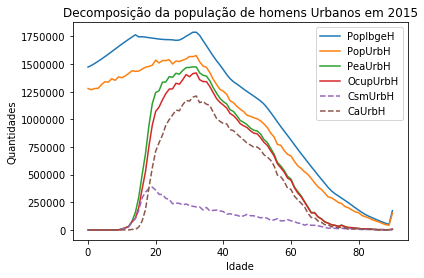

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ids = ['PopIbgeH', 'PopUrbH', 'PeaUrbH', 'OcupUrbH']

for i in ids:
    ax.plot(populacao[i][2015], label=i)

ax.plot(segurados['CsmUrbH'][2015], '--', label='CsmUrbH')
ax.plot(segurados['CaUrbH'][2015], '--', label='CaUrbH')
ax.set_ylabel('Quantidades')
ax.set_xlabel('Idade')
ax.set_title('Decomposição da população de homens Urbanos em 2015')
ax.legend()
plt.show()

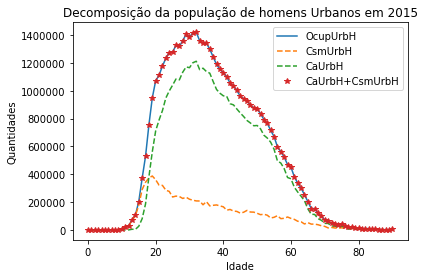

In [82]:
fig, ax = plt.subplots()

teste = segurados['CsmUrbH'][2015] + segurados['CaUrbH'][2015]

ax.plot(populacao['OcupUrbH'][2015], label='OcupUrbH')
ax.plot(segurados['CsmUrbH'][2015], '--', label='CsmUrbH')
ax.plot(segurados['CaUrbH'][2015], '--', label='CaUrbH')
ax.plot(teste, '*', label='CaUrbH+CsmUrbH')
ax.set_ylabel('Quantidades')
ax.set_xlabel('Idade')
ax.set_title('Decomposição da população de homens Urbanos em 2015')
ax.legend()
plt.show()


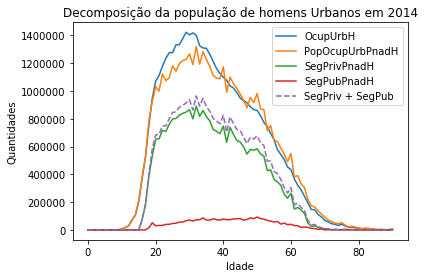

In [83]:
fig, ax = plt.subplots()

segtotal = populacao_pnad['SegPrivPnadH'][2014] + populacao_pnad['SegPubPnadH'][2014]

ax.plot(populacao['OcupUrbH'][2014],label='OcupUrbH')
ax.plot(populacao_pnad['PopOcupUrbPnadH'][2014], label='PopOcupUrbPnadH')
ax.plot(populacao_pnad['SegPrivPnadH'][2014], label='SegPrivPnadH')
ax.plot(populacao_pnad['SegPubPnadH'][2014], label='SegPubPnadH')
ax.plot(segtotal, '--', label='SegPriv + SegPub')
ax.set_ylabel('Quantidades')
ax.set_xlabel('Idade')
ax.set_title('Decomposição da população de homens Urbanos em 2014')
ax.legend()
plt.show()

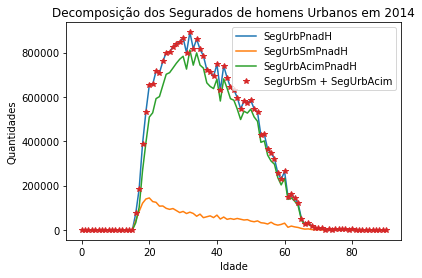

In [87]:
fig, ax = plt.subplots()

segtotal = populacao_pnad['SegUrbSmPnadH'][2014] + populacao_pnad['SegUrbAcimPnadH'][2014]

ax.plot(populacao_pnad['SegUrbPnadH'][2014], label='SegUrbPnadH')
ax.plot(populacao_pnad['SegUrbSmPnadH'][2014], label='SegUrbSmPnadH')
ax.plot(populacao_pnad['SegUrbAcimPnadH'][2014], label='SegUrbAcimPnadH')
ax.plot(segtotal, '*', label='SegUrbSm + SegUrbAcim')
ax.set_ylabel('Quantidades')
ax.set_xlabel('Idade')
ax.set_title('Decomposição dos Segurados de homens Urbanos em 2014')
ax.legend()
plt.show()





In [85]:
dados.ids_pop_pnad

['PopPnadH',
 'PopPnadM',
 'PopUrbPnadH',
 'PopUrbPnadM',
 'PopRurPnadH',
 'PopRurPnadM',
 'PeaUrbPnadH',
 'PeaUrbPnadM',
 'PeaRurPnadH',
 'PeaRurPnadM',
 'PopOcupUrbPnadH',
 'PopOcupUrbPnadM',
 'PopOcupRurPnadH',
 'PopOcupRurPnadM',
 'PopOcupUrbSmPnadH',
 'PopOcupUrbAcimPnadH',
 'PopOcupUrbSmPnadM',
 'PopOcupUrbAcimPnadM',
 'SegEspRurPnadH',
 'ContrRurPnadH',
 'SegPotRurPnadH',
 'SegEspRurPnadM',
 'ContrRurPnadM',
 'SegPotRurPnadM',
 'SegRurPnadH',
 'SegRurPnadM']